# **Diabetes EDA**
The motive of this EDA is to see insights and observation from the Data provided by Behavioral Risk Factor Surveillance System (BRFSS), an annual telephone survey by the CDC since 1984, collecting data on health-related risk behaviors, chronic health conditions, and preventative service usage.

The data set is available on kaggle: https://www.kaggle.com/datasets/abdelazizsami/cdc-diabetes-health-indicators

The information regarding the data set according to Kaggle:\
Contains 253,680 responses with 21 features. The target variable, `Diabetes_012`, has 3 classes: `0` (no diabetes or only during pregnancy), `1` (prediabetes), and `2` (diabetes). This dataset is imbalanced.

----

An important point that needs to be notes is that **Kaggle** didn't provide any documentation for the data encoding. So the we can check the column information from the original source of the data i.e., https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators. As per this webpage we can draw our conclusions on the column desrciptions:

1. **HighBP**: Binary indicator of whether the individual has been diagnosed with high blood pressure (1: Yes, 0: No).

2. **HighChol**: Binary indicator of whether the individual has been diagnosed with high cholesterol (1: Yes, 0: No).

3. **CholCheck**: Binary indicator of whether the individual has had a cholesterol check within the past five years (1: Yes, 0: No).

4. **BMI**: Body Mass Index, a continuous variable representing an individual’s weight in relation to their height.

5. **Smoker**: Binary indicator of whether the individual has smoked at least 100 cigarettes in their lifetime (1: Yes, 0: No).

6. **Stroke**: Binary indicator of whether the individual has been diagnosed with a stroke (1: Yes, 0: No).

7. **HeartDisease**: Binary indicator of whether the individual has been diagnosed with coronary heart disease or a myocardial infarction (1: Yes, 0: No).

8. **PhysActivity**: Binary indicator of whether the individual has engaged in any physical activity or exercise other than their regular job in the past 30 days (1: Yes, 0: No).

9. **Fruits**: Binary indicator of whether the individual consumes fruit at least once per day (1: Yes, 0: No).

10. **Veg**: Binary indicator of whether the individual consumes vegetables at least once per day (1: Yes, 0: No).

11. **Alcohol**: Binary indicator of heavy alcohol consumption (1: Yes, 0: No). Defined as more than 14 drinks per week for men and more than 7 drinks per week for women.

12. **HealthCoverage**: Binary indicator of whether the individual has any kind of health care coverage, including health insurance, prepaid plans, or government plans (1: Yes, 0: No).

13. **CostDoc**: Binary indicator of whether the individual could not see a doctor in the past 12 months due to cost (1: Yes, 0: No).

14. **GenHealth**: Self-reported general health status, ranging from 1 (Excellent) to 5 (Poor).

15. **MentalHealth**: Number of days in the past 30 days where the individual’s mental health was not good.

16. **PhysicalHealth**: Number of days in the past 30 days where the individual’s physical health was not good.

17. **DiffWalk**: Binary indicator of whether the individual has serious difficulty walking or climbing stairs (1: Yes, 0: No).

18. **Sex**: Binary indicator of the individual’s sex (1: Male, 0: Female).

19. **Age**: Age categorized into 14 levels ranging from 18–24 (Level 1) to 80+ (Level 14).

20. **Education**: Highest level of education completed, ranging from 1 (Never attended school) to 6 (College graduate).

21. **Income**: Household income from all sources, categorized into 8 levels (1: Less than \$10,000 to 8: \$75,000 or more).

----

## **The content of this EDA:**
- Exploring the overall data
    - Number of Columns
    - Null or duplicate values
    - Types of columns
        - categorical columns
        - numerical columns
        - target column

- Categorical Columns
    - segregating further
        - Binary
        - Singleton
        - multilabel (<=20 classes)
        - multilabel (>20 classes)
    - distribution of values using pie/bar chart

- Numerical columns
    - segregating further
        - continuous
        - discrete
    - looking for outliers in discrete values
    - understanding the distribution on continuous values

- understanding realtionships between columns (if any)
----

## Exploring the overall data set

In [1]:
# importing the neceassary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv("../raw_data/diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Number of columns and their data types

In [3]:
n_col = len(df.columns)
print(f"There are {n_col} columns in the data set.\n")
print(df.info())

There are 22 columns in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth      

### Observation:
- There is no column with `object` type, so encoding isn't needed
- The columns are mostly categorical with only continuous variable which is "BMI"

## check for null values or duplication

In [4]:
null = 0

for col in df.columns:
    if(df[col].isnull().sum() > 0):
        null += 1
        print(f"- \"{col}\" has {df[col].isnull().sum()} values.")

if(null == 0):
    print("- The Data set has no null values in it.")

if(df.duplicated().sum() > 0):
    pct = (df.duplicated().sum()/len(df))*100.0
    print(f"- There are {df.duplicated().sum()} duplications in this data set. With {pct:.2f}% of duplication.")
else:
    print("- No duplication found")

- The Data set has no null values in it.
- There are 23899 duplications in this data set. With 9.42% of duplication.


### Observation
- There are no **null** values
- There is a huge duplication that needs to be taken care of.

## Segragating features

In [5]:
cat_col = []
num_col = []
target = 'Diabetes_012'

for col in df.columns:
    if(col == target):
        continue
    
    n_uniq = df[col].value_counts().count()

    if(n_uniq < 20):
        cat_col.append(col)
    else:
        num_col.append(col)

print("Categorical columns:\n")
for col in cat_col:
    print(f"- {col}")

print("\n------------")
print("Numerical columns:\n")
for col in num_col:
    print(f"- {col}")

Categorical columns:

- HighBP
- HighChol
- CholCheck
- Smoker
- Stroke
- HeartDiseaseorAttack
- PhysActivity
- Fruits
- Veggies
- HvyAlcoholConsump
- AnyHealthcare
- NoDocbcCost
- GenHlth
- DiffWalk
- Sex
- Age
- Education
- Income

------------
Numerical columns:

- BMI
- MentHlth
- PhysHlth


### Observation
- There are more categorical data than numerical one.
- Many features feel irrelavant or may have very less relavance with target, they need to be tested

## Looking into categorica features

In [6]:
binary = []
singleton = []
countable = []
huge = []

for col in cat_col:
    n_uniq = df[col].value_counts().count()
    print(f"- \"{col}\" has {n_uniq} unique features.")
    if(n_uniq == 1):
        singleton.append(col)
    elif(n_uniq == 2):
        binary.append(col)
    elif(n_uniq <= 20):
        countable.append(col)
    else:
        huge.append(col)

- "HighBP" has 2 unique features.
- "HighChol" has 2 unique features.
- "CholCheck" has 2 unique features.
- "Smoker" has 2 unique features.
- "Stroke" has 2 unique features.
- "HeartDiseaseorAttack" has 2 unique features.
- "PhysActivity" has 2 unique features.
- "Fruits" has 2 unique features.
- "Veggies" has 2 unique features.
- "HvyAlcoholConsump" has 2 unique features.
- "AnyHealthcare" has 2 unique features.
- "NoDocbcCost" has 2 unique features.
- "GenHlth" has 5 unique features.
- "DiffWalk" has 2 unique features.
- "Sex" has 2 unique features.
- "Age" has 13 unique features.
- "Education" has 6 unique features.
- "Income" has 8 unique features.


### Observation
- Most features are binary

### Distribution of binary variables

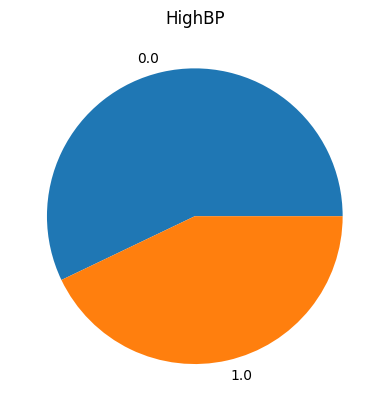

---------

1.0    108829
0.0    144851
Name: HighBP, dtype: int64
---------



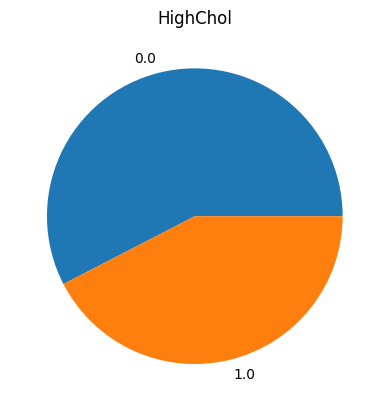

---------

1.0    107591
0.0    146089
Name: HighChol, dtype: int64
---------



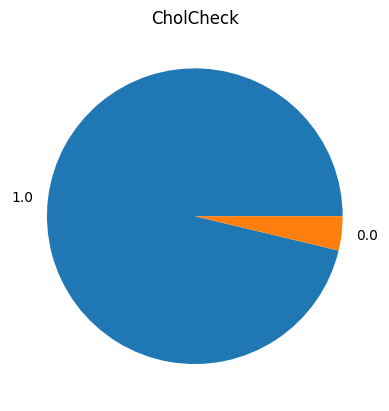

---------

1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
---------



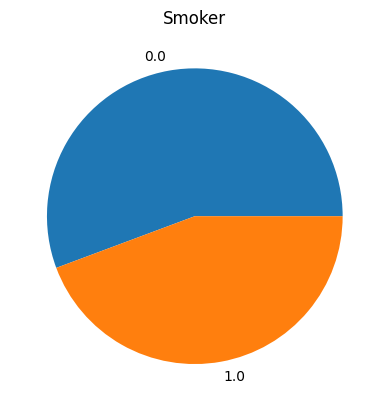

---------

1.0    112423
0.0    141257
Name: Smoker, dtype: int64
---------



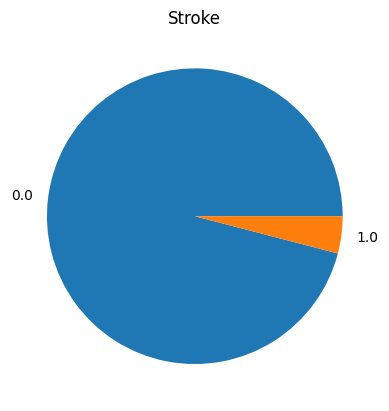

---------

1.0     10292
0.0    243388
Name: Stroke, dtype: int64
---------



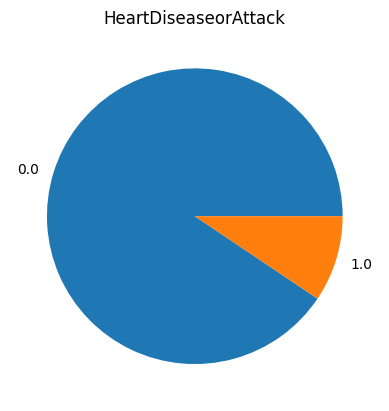

---------

1.0     23893
0.0    229787
Name: HeartDiseaseorAttack, dtype: int64
---------



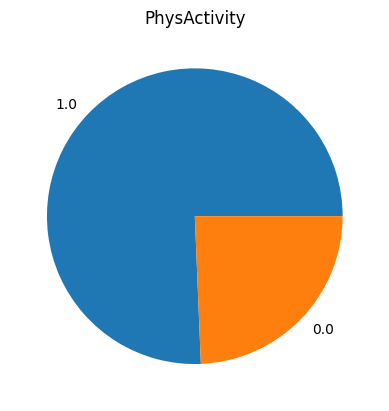

---------

1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64
---------



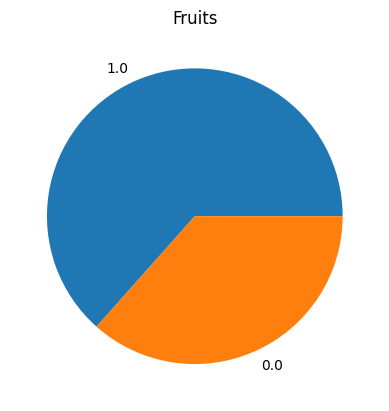

---------

1.0    160898
0.0     92782
Name: Fruits, dtype: int64
---------



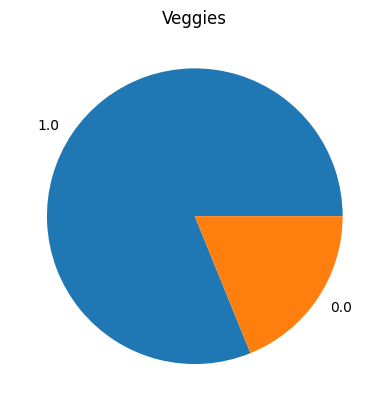

---------

1.0    205841
0.0     47839
Name: Veggies, dtype: int64
---------



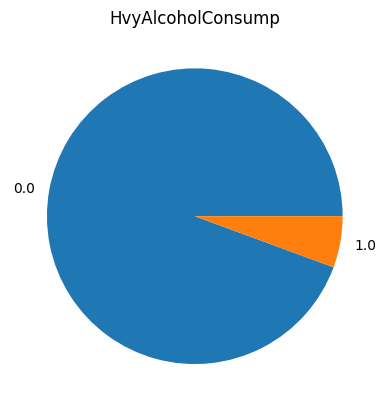

---------

1.0     14256
0.0    239424
Name: HvyAlcoholConsump, dtype: int64
---------



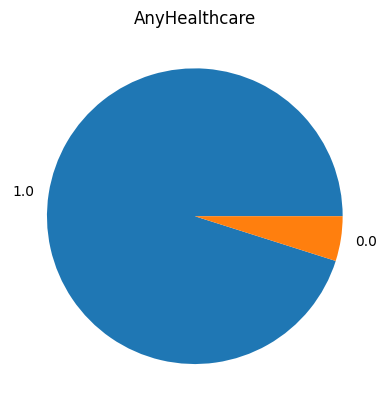

---------

1.0    241263
0.0     12417
Name: AnyHealthcare, dtype: int64
---------



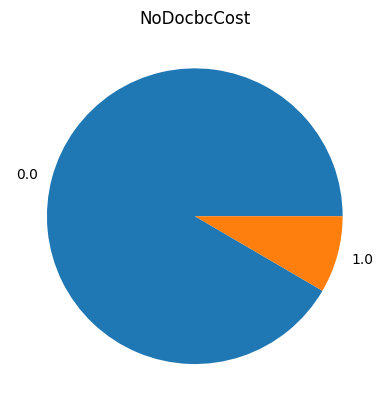

---------

1.0     21354
0.0    232326
Name: NoDocbcCost, dtype: int64
---------



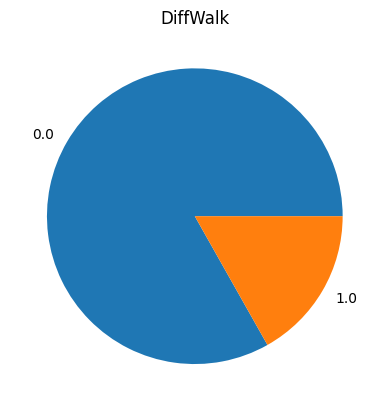

---------

1.0     42675
0.0    211005
Name: DiffWalk, dtype: int64
---------



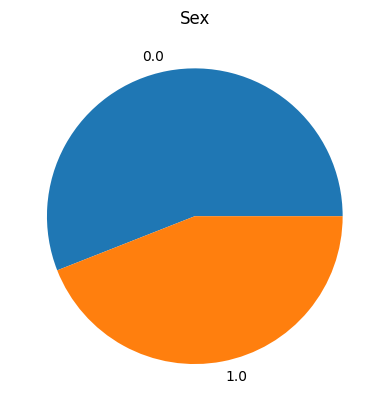

---------

1.0    111706
0.0    141974
Name: Sex, dtype: int64
---------



In [7]:
for col in binary:
    plt.pie(df[col].value_counts().values, labels=df[col].value_counts().index)
    plt.title(col)
    plt.show()
    print("---------\n")
    print(df[col].value_counts().sort_index(ascending=False))
    print("---------\n")

### Observation
- Many features have nearly balanced distribution, like sex, smoking, high bp and cholestrol
- Some features show unbalanced trends like:
    - most people believe they have good fruits and veggies intake, and have good physical activity
    - most people didn't had any stroke, or heartdisease
    - a very high amount of people had their cholestrol check in last five years
    - Less people had difficulty of walking
    - a large amount of people declined heavy alchohol consumption
    - most people agreed on affording healthcare and they do have health care

### Distribution of non binary/countable variables

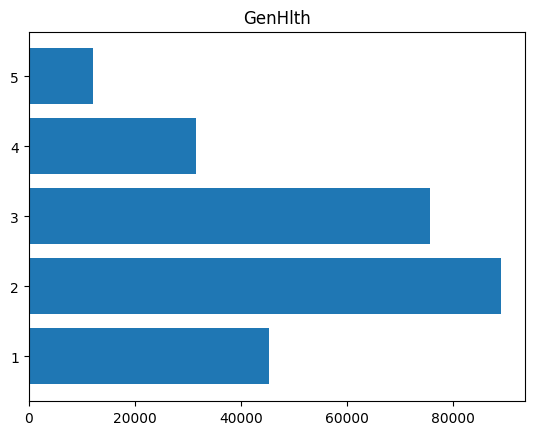

---------

5.0    12081
4.0    31570
3.0    75646
2.0    89084
1.0    45299
Name: GenHlth, dtype: int64
---------



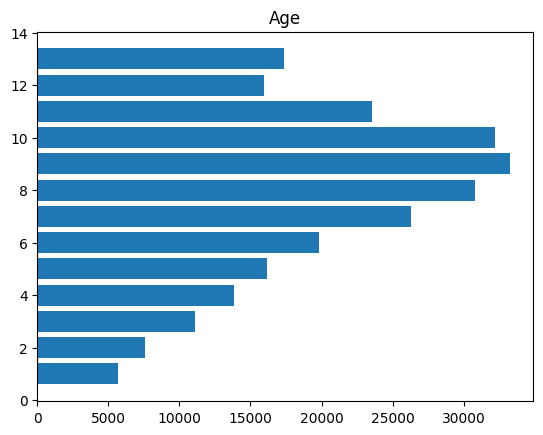

---------

13.0    17363
12.0    15980
11.0    23533
10.0    32194
9.0     33244
8.0     30832
7.0     26314
6.0     19819
5.0     16157
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64
---------



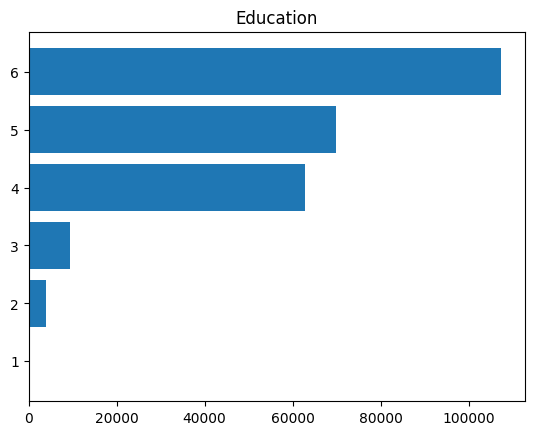

---------

6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: Education, dtype: int64
---------



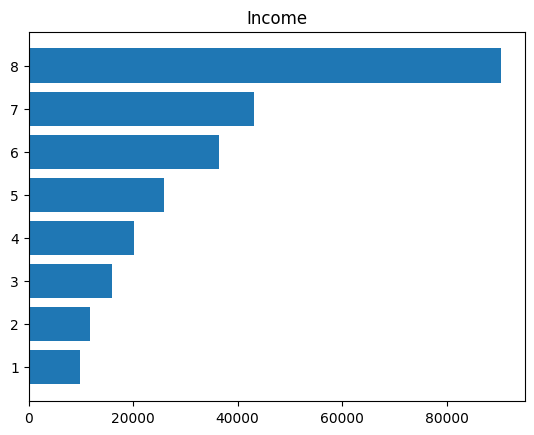

---------

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64
---------



In [8]:
for col in countable:
    plt.barh(df[col].value_counts().sort_index().index, df[col].value_counts().sort_index().values)
    plt.title(col)
    plt.show()
    print("---------\n")
    print(df[col].value_counts().sort_index(ascending=False))
    print("---------\n")

### Observation
- Age seems to have a normal distribution.
- Most people assume there health to be on better side.
- Data has more instances of people with high eduction and income.

## Looking into **Numerical variables**

Information of "BMI": 

   index            BMI
0  count  253680.000000
1   mean      28.382364
2    std       6.608694
3    min      12.000000
4    25%      24.000000
5    50%      27.000000
6    75%      31.000000
7    max      98.000000

-----------

Information of "MentHlth": 

   index       MentHlth
0  count  253680.000000
1   mean       3.184772
2    std       7.412847
3    min       0.000000
4    25%       0.000000
5    50%       0.000000
6    75%       2.000000
7    max      30.000000

-----------

Information of "PhysHlth": 

   index       PhysHlth
0  count  253680.000000
1   mean       4.242081
2    std       8.717951
3    min       0.000000
4    25%       0.000000
5    50%       0.000000
6    75%       3.000000
7    max      30.000000

-----------



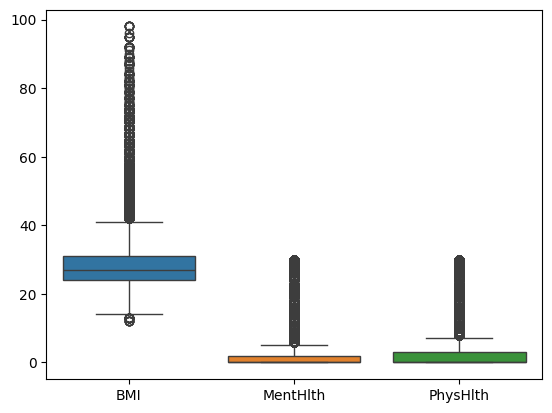

In [9]:
for col in num_col:
    print(f"Information of \"{col}\": \n")
    print(df[col].describe().reset_index())
    print("\n-----------\n")

sns.boxplot(df[num_col])
plt.show()

### observations
- BMI distribution shows that most people are overweight and extreme obesity cases are also there.
- Physical and mental health shows similar trend which can be a sign of correlation. Both distriubtion shows that most people had lesser bad days but people with more days are there.
- There are many outliers which show that the there are many extreme cases in the data.

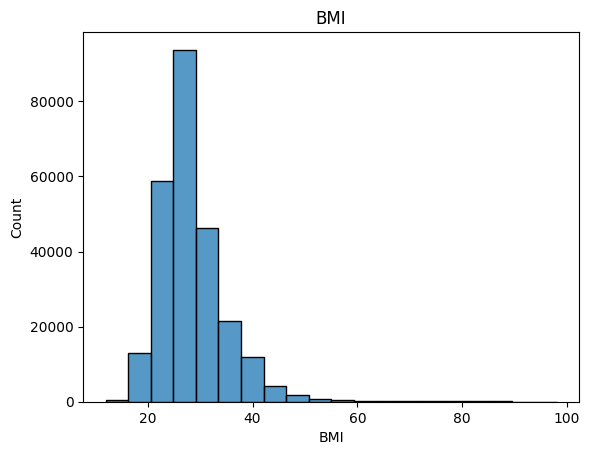

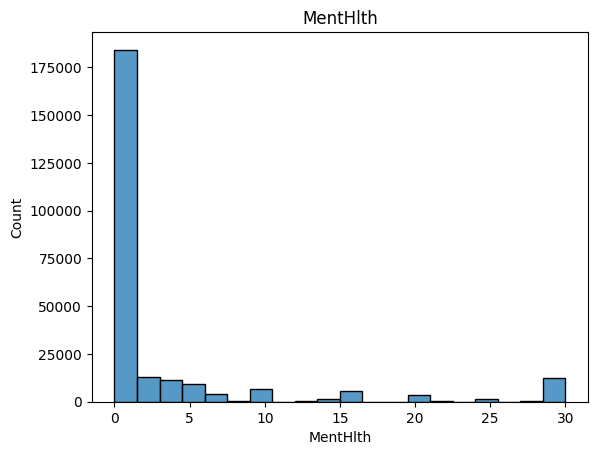

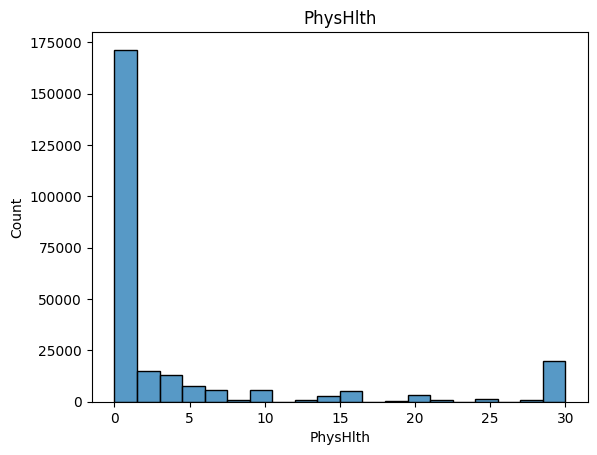

In [10]:
for col in num_col:
    sns.histplot(df[col], bins=20)
    plt.title(col)
    plt.show()

### Observation
- BMI shows a slighlty left skewed with mostly ranging between 20 to 40
- Both physical and mental health are left skewed and it is likely for them to have a relationship.

## Checking for relationships among columns

<Axes: >

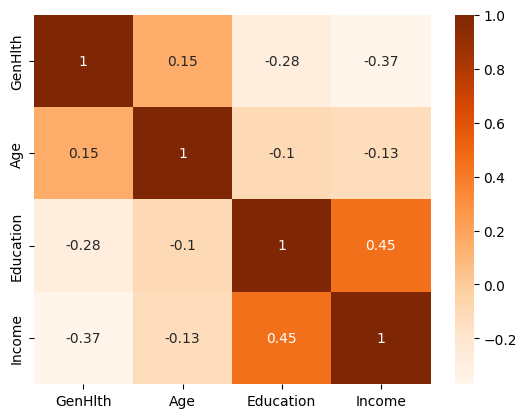

In [14]:
sns.heatmap(df[countable].corr(), annot=True, cmap='Oranges')

### Observation
- education and income has a good possitive correlation.
- physical and mental health seems to have a good correlation but there's lower correlation between them.

## Relationship for target and numerical values

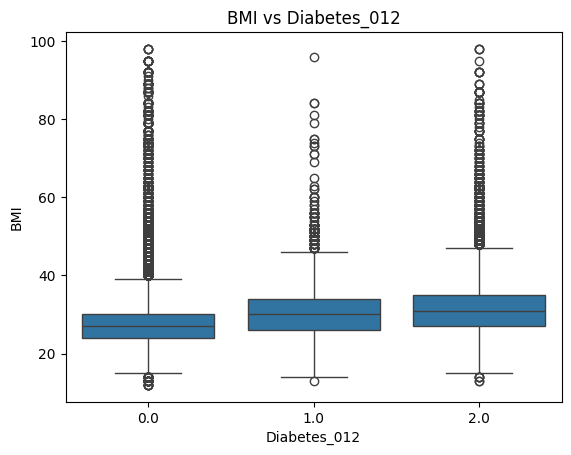

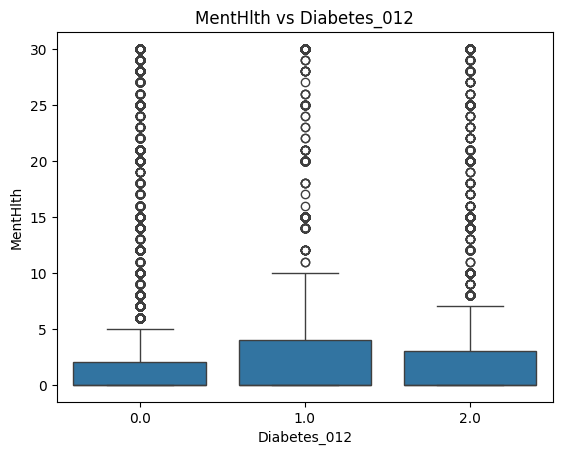

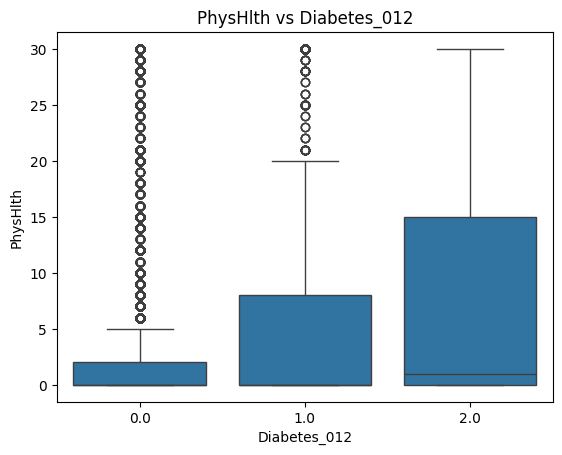

In [12]:
for col in num_col:
    sns.boxplot(
        x=target,
        y=col,
        data=df
    )
    plt.title(f"{col} vs {target}")
    plt.show()


### Observation
- There's a high variation of responses in physical health having diabetic condition

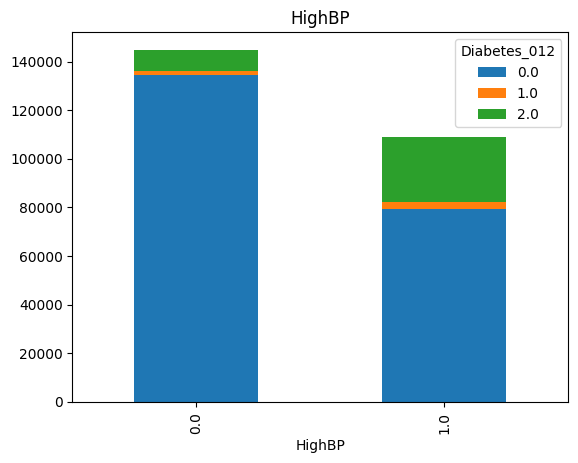

"0.0" has 1.19% pre-diabetes cases and 6.04% Diabetes cases
"1.0" has 2.68% pre-diabetes cases and 24.45% Diabetes cases


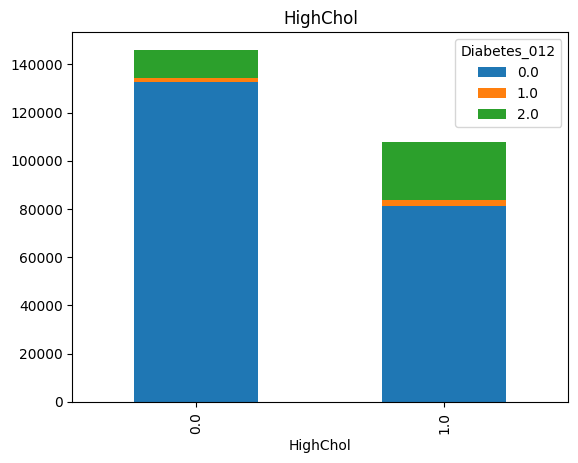

"0.0" has 1.20% pre-diabetes cases and 7.98% Diabetes cases
"1.0" has 2.67% pre-diabetes cases and 22.01% Diabetes cases


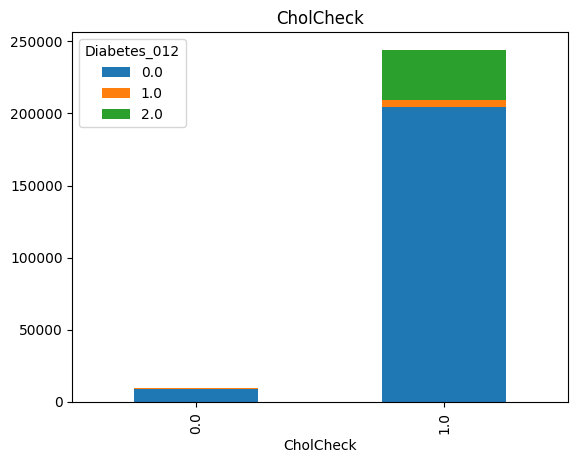

"0.0" has 0.65% pre-diabetes cases and 2.54% Diabetes cases
"1.0" has 1.87% pre-diabetes cases and 14.37% Diabetes cases


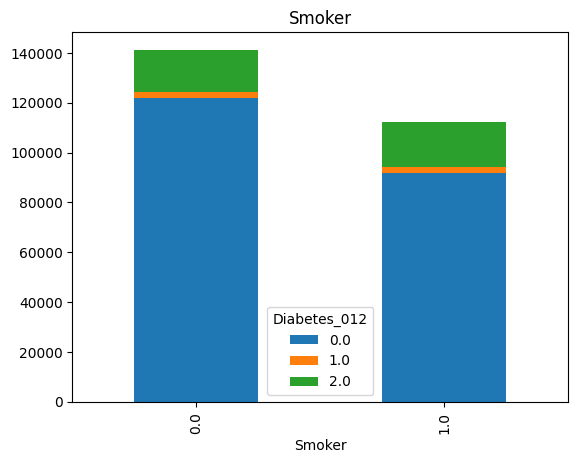

"0.0" has 1.66% pre-diabetes cases and 12.06% Diabetes cases
"1.0" has 2.03% pre-diabetes cases and 16.29% Diabetes cases


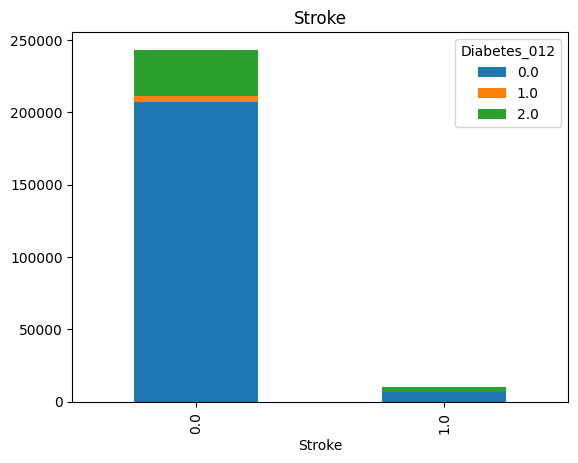

"0.0" has 1.79% pre-diabetes cases and 13.18% Diabetes cases
"1.0" has 2.57% pre-diabetes cases and 31.75% Diabetes cases


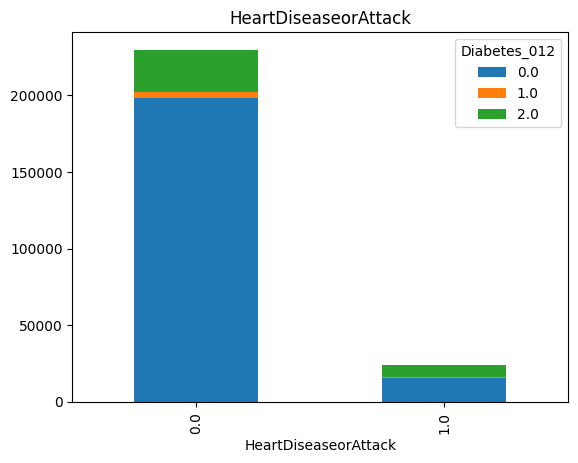

"0.0" has 1.73% pre-diabetes cases and 11.95% Diabetes cases
"1.0" has 2.78% pre-diabetes cases and 32.97% Diabetes cases


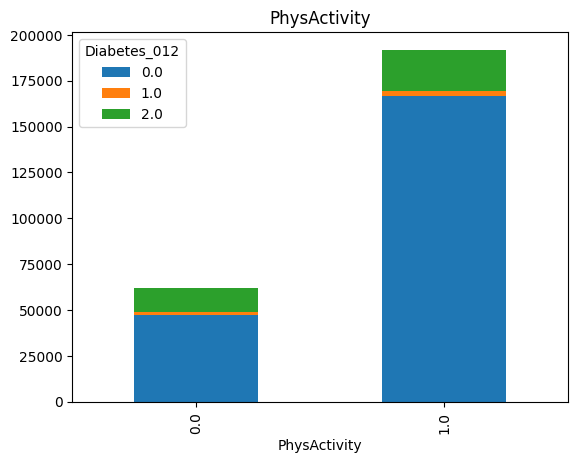

"0.0" has 2.41% pre-diabetes cases and 21.14% Diabetes cases
"1.0" has 1.64% pre-diabetes cases and 11.61% Diabetes cases


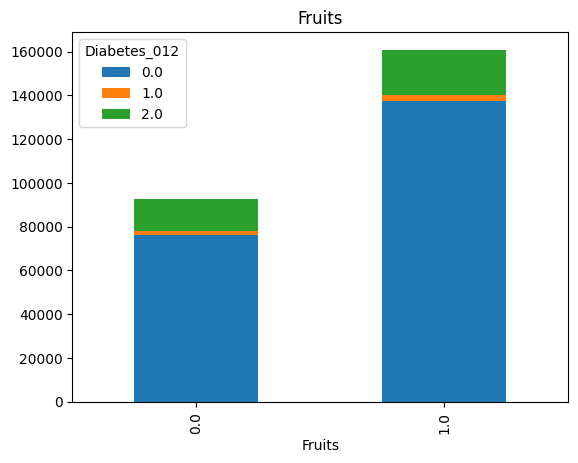

"0.0" has 1.99% pre-diabetes cases and 15.79% Diabetes cases
"1.0" has 1.73% pre-diabetes cases and 12.86% Diabetes cases


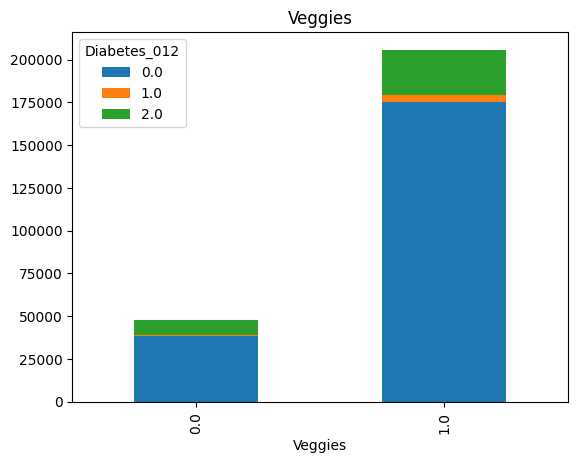

"0.0" has 2.24% pre-diabetes cases and 18.00% Diabetes cases
"1.0" has 1.73% pre-diabetes cases and 12.99% Diabetes cases


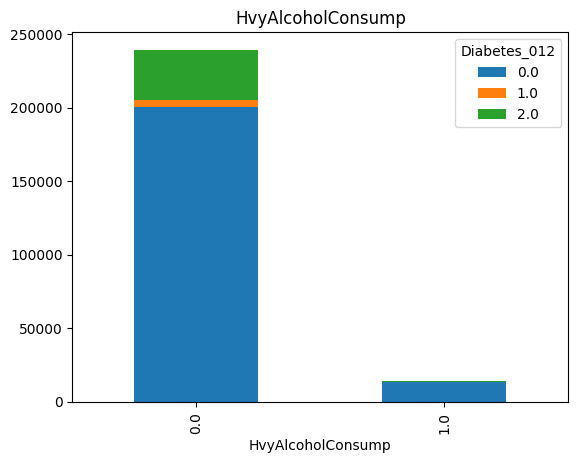

"0.0" has 1.85% pre-diabetes cases and 14.42% Diabetes cases
"1.0" has 1.46% pre-diabetes cases and 5.84% Diabetes cases


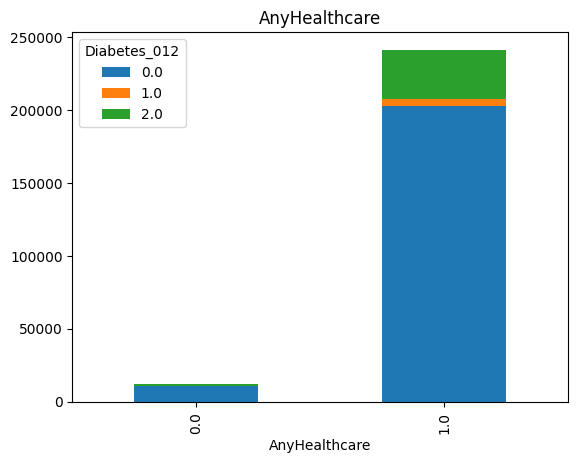

"0.0" has 2.05% pre-diabetes cases and 11.45% Diabetes cases
"1.0" has 1.81% pre-diabetes cases and 14.06% Diabetes cases


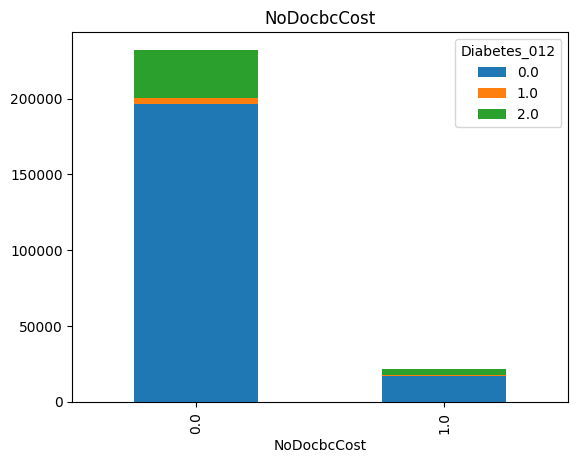

"0.0" has 1.74% pre-diabetes cases and 13.60% Diabetes cases
"1.0" has 2.81% pre-diabetes cases and 17.52% Diabetes cases


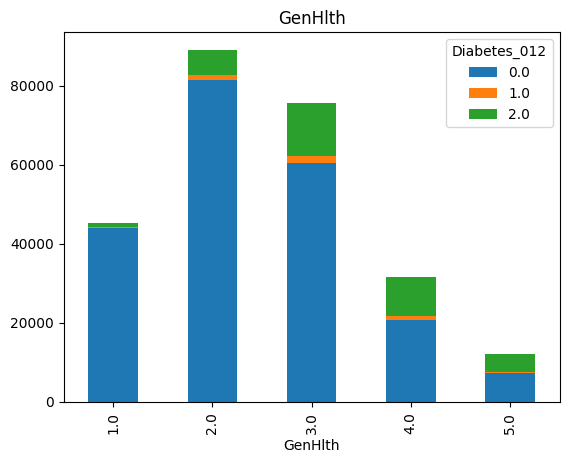

"1.0" has 0.69% pre-diabetes cases and 2.52% Diabetes cases
"2.0" has 1.36% pre-diabetes cases and 7.16% Diabetes cases
"3.0" has 2.28% pre-diabetes cases and 17.79% Diabetes cases
"4.0" has 3.25% pre-diabetes cases and 31.01% Diabetes cases
"5.0" has 2.91% pre-diabetes cases and 37.89% Diabetes cases


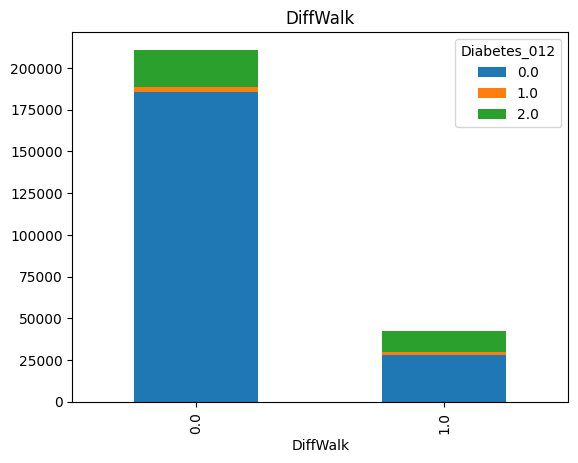

"0.0" has 1.59% pre-diabetes cases and 10.53% Diabetes cases
"1.0" has 3.01% pre-diabetes cases and 30.75% Diabetes cases


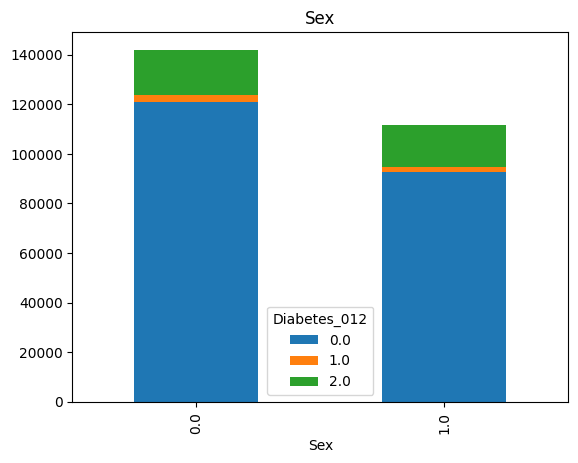

"0.0" has 1.83% pre-diabetes cases and 12.97% Diabetes cases
"1.0" has 1.81% pre-diabetes cases and 15.16% Diabetes cases


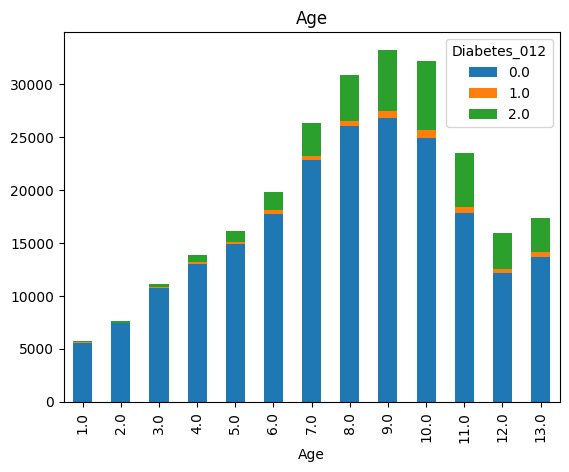

"1.0" has 0.37% pre-diabetes cases and 1.37% Diabetes cases
"2.0" has 0.71% pre-diabetes cases and 1.84% Diabetes cases
"3.0" has 0.65% pre-diabetes cases and 2.82% Diabetes cases
"4.0" has 1.03% pre-diabetes cases and 4.53% Diabetes cases
"5.0" has 1.01% pre-diabetes cases and 6.50% Diabetes cases
"6.0" has 1.57% pre-diabetes cases and 8.79% Diabetes cases
"7.0" has 1.59% pre-diabetes cases and 11.74% Diabetes cases
"8.0" has 1.78% pre-diabetes cases and 13.83% Diabetes cases
"9.0" has 2.11% pre-diabetes cases and 17.25% Diabetes cases
"10.0" has 2.16% pre-diabetes cases and 20.37% Diabetes cases
"11.0" has 2.56% pre-diabetes cases and 21.85% Diabetes cases
"12.0" has 2.78% pre-diabetes cases and 21.30% Diabetes cases
"13.0" has 2.61% pre-diabetes cases and 18.48% Diabetes cases


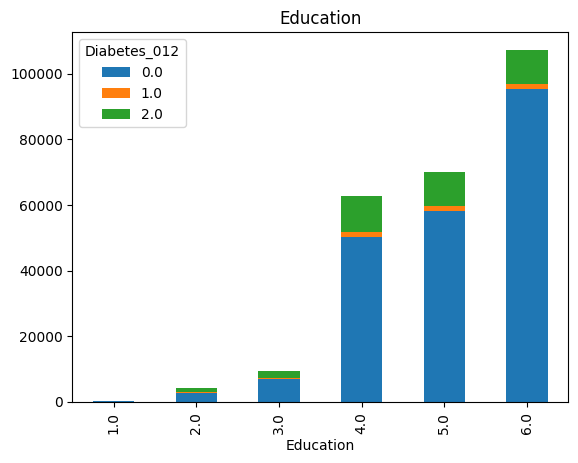

"1.0" has 1.15% pre-diabetes cases and 27.01% Diabetes cases
"2.0" has 3.98% pre-diabetes cases and 29.26% Diabetes cases
"3.0" has 3.31% pre-diabetes cases and 24.22% Diabetes cases
"4.0" has 2.15% pre-diabetes cases and 17.64% Diabetes cases
"5.0" has 1.91% pre-diabetes cases and 14.81% Diabetes cases
"6.0" has 1.37% pre-diabetes cases and 9.69% Diabetes cases


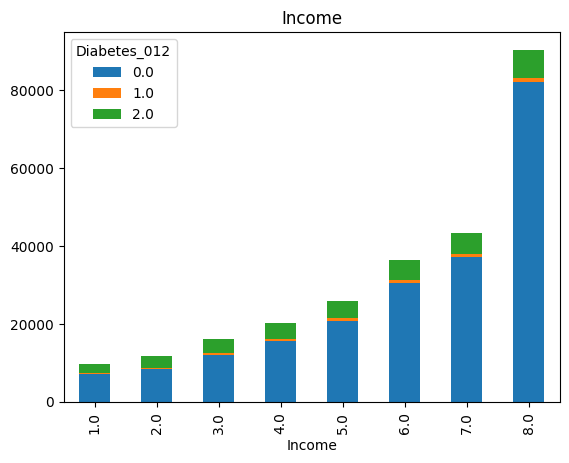

"1.0" has 3.20% pre-diabetes cases and 24.29% Diabetes cases
"2.0" has 3.02% pre-diabetes cases and 26.19% Diabetes cases
"3.0" has 2.63% pre-diabetes cases and 22.31% Diabetes cases
"4.0" has 2.28% pre-diabetes cases and 20.13% Diabetes cases
"5.0" has 2.27% pre-diabetes cases and 17.40% Diabetes cases
"6.0" has 2.05% pre-diabetes cases and 14.51% Diabetes cases
"7.0" has 1.70% pre-diabetes cases and 12.18% Diabetes cases
"8.0" has 1.12% pre-diabetes cases and 7.96% Diabetes cases


In [13]:
import warnings
warnings.filterwarnings('ignore')

for col in cat_col:
    ct = pd.crosstab(df[col], df[target])
    ct.plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()
    for i in ct.index:
        print(f"\"{i}\" has {ct[1][i]/(ct[0][i] + ct[1][i] + ct[2][i]) * 100:.2f}% pre-diabetes cases and {ct[2][i]/(ct[0][i] + ct[1][i] + ct[2][i]) * 100:.2f}% Diabetes cases")